In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/ml_project_updated/train_set/"
test_dir = "/content/drive/MyDrive/ml_project_updated/test_set/"

# Image Data Generator with augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation data
)

# Load train and validation datasets
train_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get class labels
class_names = list(train_data.class_indices.keys())
print("Classes:", class_names)


Found 423 images belonging to 6 classes.
Found 105 images belonging to 6 classes.
Classes: ['FU-athlete-foot', 'FU-hand-ringworm', 'FU-jock-itch', 'FU-nail-fungus', 'FU-ringworm', 'FU-scalp-ringworm']


In [ ]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')  # Output layer with 'n' classes
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,126 (18.42 MB)

 Trainable params: 4,829,126 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=30
)

# Save the model
model.save('/content/drive/MyDrive/ml_project_updated/model.h5')
print("Model saved successfully!")

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 145s 10s/step - accuracy: 0.1443 - loss: 1.9480 - val_accuracy: 0.2286 - val_loss: 1.7637
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.2494 - loss: 1.7525 - val_accuracy: 0.3714 - val_loss: 1.5913
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3782 - loss: 1.6066 - val_accuracy: 0.3619 - val_loss: 1.5294
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.3430 - loss: 1.5721 - val_accuracy: 0.4571 - val_loss: 1.4265
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3785 - loss: 1.4989 - val_accuracy: 0.4381 - val_loss: 1.3685
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.3816 - loss: 1.4420 - val_accuracy: 0.2190 - val_loss: 1.7933
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3103 - loss: 1.6360 - val_accuracy: 0.4476 - val_loss: 1.4087
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.3692 - loss: 1.5075 - val_accuracy: 0.4095 - val_los

Model saved successfully!


Testing image: /content/drive/MyDrive/ml_project_updated/test_set/FU-scalp-ringworm/images (11).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Predicted Infection Type: FU-scalp-ringworm


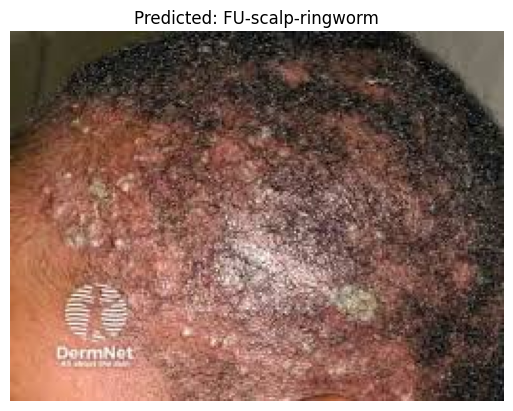

In [ ]:
# Load trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml_project_updated/model.h5')

# Get all test image paths from subdirectories
all_test_images = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):
        for img_file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_file)
            all_test_images.append(img_path)

# Check if images exist
if len(all_test_images) == 0:
    print("No test images found!")
else:
    # Select a random image
    test_image_path = random.choice(all_test_images)
    print("Testing image:", test_image_path)

    # Function to predict an image
    def predict_image(image_path, model, class_names):
        img = load_img(image_path, target_size=(150, 150))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]

        return predicted_class

    # Predict result
    result = predict_image(test_image_path, model, class_names)
    print(f"Predicted Infection Type: {result}")

    # Display image
    img = load_img(test_image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {result}")
    plt.axis("off")
    plt.show()


In [ ]:
# optimization for better accuracy using SDD along with CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load Pretrained MobileNetV2 (Feature Extractor)
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model layers

# SSD-inspired Classification Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
# Changed line below: Assigned the output of the Dense layer to 'predictions'
predictions = Dense(len(class_names), activation='softmax')(x)  # Output layer

# Create Model
# Changed line below: Used 'predictions' as the output of the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

# Save Model
model.save('/content/drive/MyDrive/ml_project_updated/model_ssd.h5')
print("Model saved successfully!")

/tmp/ipython-input-2393553024.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 75, 75,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 75, 75,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 75, 75,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 75, 75,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 75, 75,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 75, 75,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 75, 75,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 75, 75,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 77, 77,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 38, 38,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 38, 38,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 38, 38,    │      2,304 │ block_1_depthwis

 Total params: 2,587,462 (9.87 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.2902 - loss: 2.3348 - val_accuracy: 0.6190 - val_loss: 0.9875
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 988ms/step - accuracy: 0.6276 - loss: 0.9690 - val_accuracy: 0.7905 - val_loss: 0.6338
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 888ms/step - accuracy: 0.7076 - loss: 0.7446 - val_accuracy: 0.8000 - val_loss: 0.5516
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 14s 990ms/step - accuracy: 0.8193 - loss: 0.5611 - val_accuracy: 0.8286 - val_loss: 0.5190
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 12s 884ms/step - accuracy: 0.8181 - loss: 0.5021 - val_accuracy: 0.8286 - val_loss: 0.3965
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 913ms/step - accuracy: 0.8788 - loss: 0.3755 - val_accuracy: 0.8381 - val_loss: 0.4281
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8163 - loss: 0.5436 - val_accuracy: 0.8286 - val_loss: 0.4956
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 19s 965ms/step - accuracy: 0.8600 - loss: 0.4268 - val_accuracy: 

Model saved successfully!


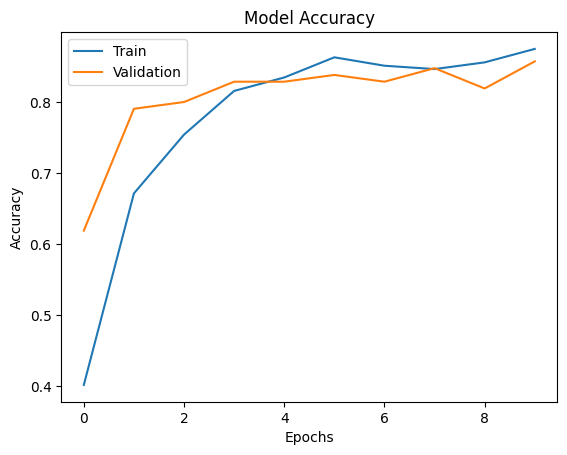

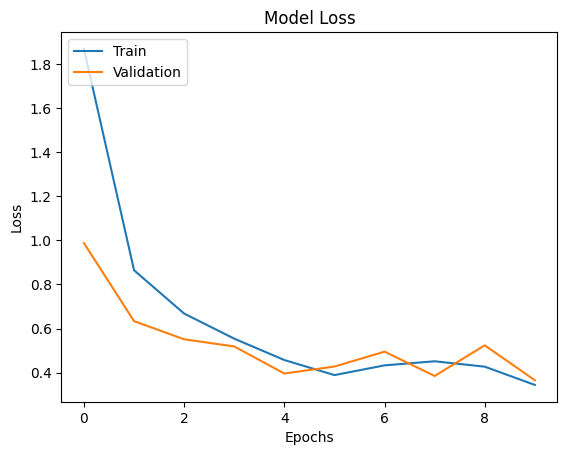

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Found 134 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 6s/step - accuracy: 0.8708 - loss: 0.3590

✅ Test Accuracy: 88.06%
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step


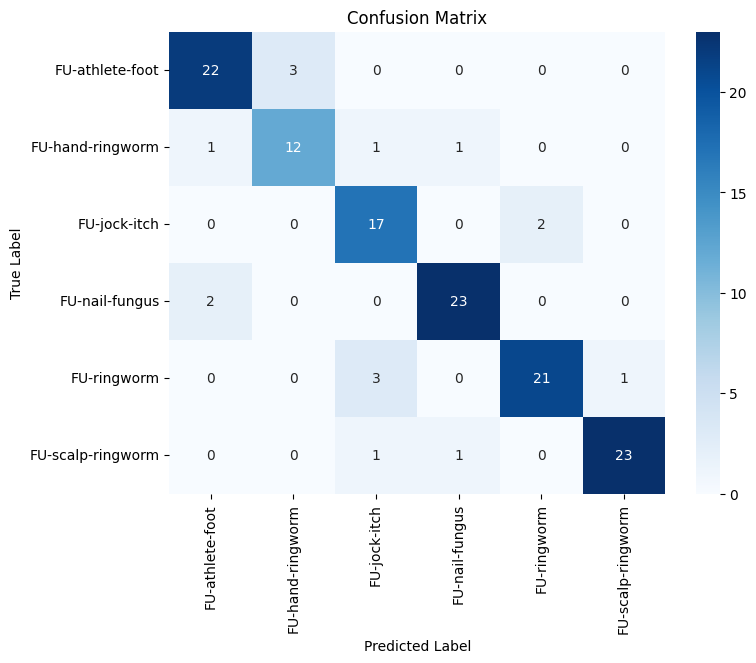


🔹 Classification Report:
                   precision    recall  f1-score   support

  FU-athlete-foot       0.88      0.88      0.88        25
 FU-hand-ringworm       0.80      0.80      0.80        15
     FU-jock-itch       0.77      0.89      0.83        19
   FU-nail-fungus       0.92      0.92      0.92        25
      FU-ringworm       0.91      0.84      0.88        25
FU-scalp-ringworm       0.96      0.92      0.94        25

         accuracy                           0.88       134
        macro avg       0.87      0.88      0.87       134
     weighted avg       0.88      0.88      0.88       134


🔹 Accuracy: 0.88


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming your test data generator is defined as:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Must match your model input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle so predictions align with labels
)

# 1️⃣ **Evaluate the Model**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\n✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# 2️⃣ **Get Predictions**
y_pred_probabilities = model.predict(test_generator)
y_pred = np.argmax(y_pred_probabilities, axis=1)  # Convert softmax outputs to class indices

# Get True Labels
y_true = test_generator.classes  # True class indices

# 3️⃣ **Plot Confusion Matrix**
class_labels = list(test_generator.class_indices.keys())  # Get class names

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 4️⃣ **Print Classification Report**
print("\n🔹 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# 5️⃣ **Additional Evaluation Metrics**
accuracy = accuracy_score(y_true, y_pred)
print(f"\n🔹 Accuracy: {accuracy:.2f}")



In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/ml_project_updated/model.h5')

# Define the test dataset directory (Update this path)
test_dir = "/content/drive/MyDrive/ml_project_updated/test_set"  # Update with your actual path
class_names = ["FU-athlete-foot", "FU-hand-ringworm", "FU-jock-itch", "FU-nail-fungus", "FU-ringworm", "FU-scalp-ringworm"]

# Get all test image paths from subdirectories
all_test_images = []
for subdir in os.listdir(test_dir):
    subdir_path = os.path.join(test_dir, subdir)
    if os.path.isdir(subdir_path):
        for img_file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_file)
            all_test_images.append(img_path)

# Check if images exist
if len(all_test_images) == 0:
    print("No test images found!")
else:
    # Select a random image
    test_image_path = random.choice(all_test_images)
    print("Testing image:", test_image_path)

    # Function to predict an image
    def predict_image(image_path, model, class_names):
        img = load_img(image_path, target_size=(150, 150))  # Resize based on your model input size
        img_array = img_to_array(img) / 255.0  # Normalize image to 0-1 range
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]  # Get class with highest probability

        return predicted_class

    # Predict result
    result = predict_image(test_image_path, model, class_names)
    print(f"Predicted Infection Type: {result}")

    # Display image
    img = load_img(test_image_path)
    plt.imshow(img)
    plt.title(f"Predicted: {result}")
    plt.axis("off")  # Hide axis
    plt.show()


Saving images (10).jpeg to images (10).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


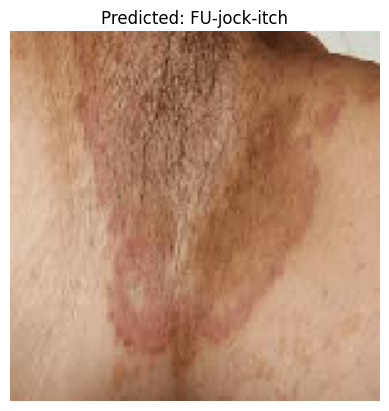

Prediction for the uploaded image: FU-jock-itch


In [ ]:
from google.colab import files
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Function to upload and predict a new image
def upload_and_predict(model, class_names):
    # Prompt user to upload an image
    uploaded = files.upload()  # This will prompt the user to upload a file

    for image_name in uploaded.keys():
        # Load and process the uploaded image
        img_path = image_name  # Get the file path of the uploaded image
        img = load_img(img_path, target_size=(150, 150))  # Resize to match model input
        img_array = img_to_array(img) / 255.0  # Convert to array and rescale
        img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match model input shape

        # Make prediction
        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]  # Get the class with the highest probability

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f"Predicted: {predicted_class}")
        plt.axis("off")
        plt.show()

        print(f"Prediction for the uploaded image: {predicted_class}")

# Call the function to upload and predict
upload_and_predict(model, class_names)
